In [1]:
# 图像预处理完整样例
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def preprocess_for_train(image, height, width):
    if image.dtype != tf.float32:
        image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # 将图片随机调整为神经网络输入层的大小。
    image = tf.image.resize_images(image, [height, width], method=np.random.randint(4))
    # 随机左右上下翻转
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    # image = tf.image.per_image_standardization(image) # 均值为0再clip后应该会丢失一些信息?
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image

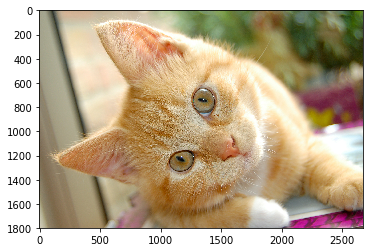

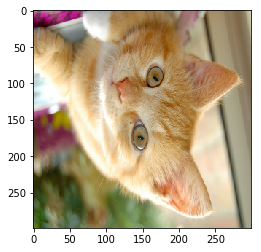

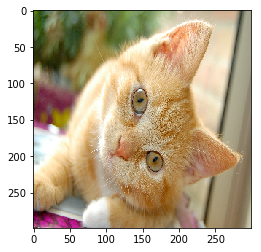

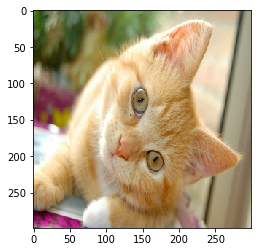

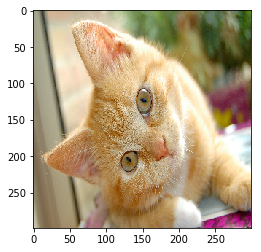

In [3]:
image_raw_data = tf.gfile.FastGFile("../../datasets/cat.jpg", "rb").read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    plt.imshow(img_data.eval())
    plt.show()
    for i in range(4):
        result = preprocess_for_train(img_data, 299, 299)
        plt.imshow(result.eval())
        plt.show()